<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/exams/Examen_2020_1_01_enunciado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primer Examen 15%

## Ejercicio 1
Encuentre las raices positivas de:
$$x^{2}-4 x \sin x+(2 \sin x)^{2}=0$$

## Ejercicio 2
La rapidez $v$ de un cohete en un vuelo vertical cerca a la superficie de la tierra puede ser aproximada por 
$$
v=u \ln \frac{M_{0}}{M_{0}-\dot{m} t}-g t
$$
donde
* $u$ en $\mathrm{m} / \mathrm{s}$, es la velocidad de expulsión del combustible relativa al cohete.
* $M_{0}$ en $\mathrm{kg}$ es la masa del cohete al tiempo de despegue. 
* $\dot{m}$ en $\mathrm{kg} / \mathrm{s}$ es la tasa consumo de combustible 
* $g=9.8 \mathrm{m} / \mathrm{s}^{2}$ es la aceleración gravitacional
* $t$ en $s$, tiempo medido desde el despegue

Para los datos en: https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/rocket.json

1. Lea los datos en un `DataFrame` de `pandas` y verifique que $\dot{m}$ (`mdot`) es la única columna que está cambiando.
1. Agregue una columna al `DataFrame` con el tiempo que tarda el cohete para alcanzar la velocidad del sonido $(335 \mathrm{m} / \mathrm{s})$ para cada valor de $\dot{m}$
2. Gráfique dicho tiempo en función de $\dot{m}$ rotulando apropiadamente los ejes

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
df=pd.read_json('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/rocket.json')

In [4]:
df

,M0,g,mdot,u
0,2800000,9.8,10000,2510
1,2800000,9.8,11000,2510
2,2800000,9.8,12000,2510
3,2800000,9.8,13000,2510
4,2800000,9.8,14000,2510
5,2800000,9.8,15000,2510


Evitar el uso de ciclos de Python 

In [5]:
import numpy as np
from scipy import optimize

In [6]:
vs=335.
df['t']=df.apply(lambda row: #dictionary with the DataFrame row → requires axis='columns' at the end
                 optimize.newton(
                    lambda t: row.u * np.log(row.M0 / (row.M0 - row.mdot * t)) - row.g * t - vs, #Function
                    x0=150 ), #initial guess
                 axis='columns'
                )

In [7]:
df

,M0,g,mdot,u,t
0,2800000,9.8,10000,2510,135.830647
1,2800000,9.8,11000,2510,109.017811
2,2800000,9.8,12000,2510,89.202572
3,2800000,9.8,13000,2510,74.455682
4,2800000,9.8,14000,2510,63.324893
5,2800000,9.8,15000,2510,54.770940


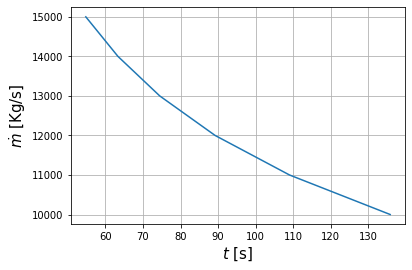

In [8]:
plt.plot(df.t,df.mdot)
plt.xlabel('$t$ [s]',size=15)
plt.ylabel(r'$\dot{m}$ [Kg/s]',size=15)
plt.grid()